In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
np.random.seed(0)
kMaxSteps = 200
kNumFeatures = 50
kMapSize = 64
obstacles = np.random.randint(0,kMapSize-1,size=(2,kNumFeatures))
kInfluenceRadius = 5
kGoal = 1
kObjects = 1
kVelocityCap = 1

k = 32


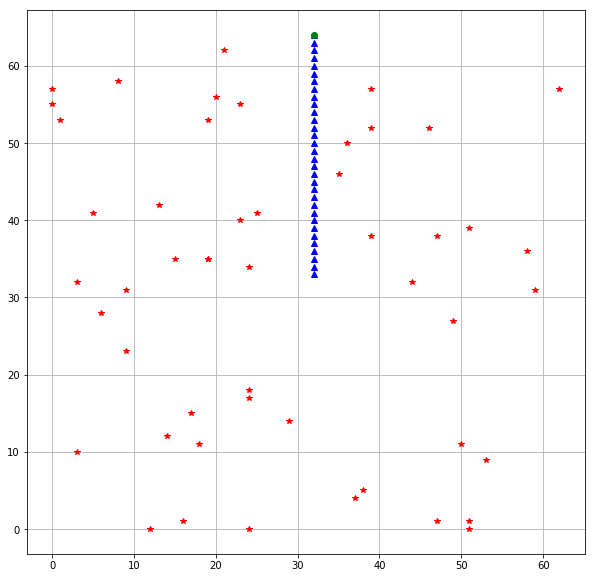

In [39]:
k = 0
xStart = np.array([kMapSize/2, kMapSize/2]).reshape(2,-1)
xGoal = np.array([kMapSize/2,kMapSize]).reshape(2,-1)
xRobot = xStart
GoalError =  xGoal - xRobot;
robot_xy = np.array(xRobot)
robot_th = np.array(0)
plt.figure(figsize=(10,10))

while (np.linalg.norm(GoalError)>1 and k < kMaxSteps):
    relative_positions = obstacles - np.tile(xRobot,(1,kNumFeatures))
    for i in range(relative_positions.shape[1]):
        if(np.all(relative_positions[:,i] == [0,0])):
            print("Error: obstacle and robot are both at position:",obstacles[:,i],"so will now move robot slightly away from this")
            relative_positions[:,i] = [1e-3,1e-3]
            print("k = ",k)
    distances = np.sqrt(np.sum(np.square(relative_positions),axis=0))
    idx_proximal = distances < kInfluenceRadius
    if(any(idx_proximal)):
        rho = np.tile(distances[idx_proximal],(2,1))
        V = relative_positions[:,idx_proximal]
        DrhoDx = -V/rho
        F = (1/rho-1/kInfluenceRadius)*1/(np.square(rho))*DrhoDx
        FObjects = kObjects*np.sum(F,axis=1).reshape(-1,1)
    else:
        FObjects = np.array([0,0]).reshape(-1,1)
    FGoal = kGoal*(GoalError)/np.linalg.norm(GoalError);
    FTotal = FGoal+FObjects;
    FTotal = FTotal/np.linalg.norm(FTotal)*min(kVelocityCap,np.linalg.norm(FTotal))
    thetaRobot = math.atan2(FTotal[1],FTotal[0])
    xRobot = xRobot+FTotal;
    robot_xy=np.append(robot_xy,xRobot,axis=1)
    robot_th=np.append(robot_th,thetaRobot)
    plt.plot(xRobot[0],xRobot[1],'b^')
    GoalError = xGoal - xRobot
    k += 1
plt.plot(obstacles[0,:],obstacles[1,:],'r*');
plt.plot(xGoal[0],xGoal[1],'go')
plt.grid()
print("k =",k)

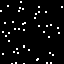

In [40]:
import numpy as np
from PIL import Image
data = np.zeros((kMapSize,kMapSize), dtype=np.uint8)
obstacle_radius = 1
for i in range(kNumFeatures):
    data[kMapSize-obstacles[1,i]-obstacle_radius:kMapSize-obstacles[1,i]+obstacle_radius,
         obstacles[0,i]-obstacle_radius:obstacles[0,i]+obstacle_radius] = 255
img = Image.fromarray(data, 'L')
display(img)

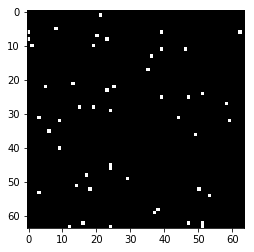

In [41]:
data = np.zeros((kMapSize,kMapSize), dtype=np.uint8)
for i in range(kNumFeatures):
    data[kMapSize-obstacles[1,i]-1,
         obstacles[0,i]] = 255
img = Image.fromarray(data, 'L')
# plt.figure(figsize=(2,2))
plt.imshow(img,cmap='gray')

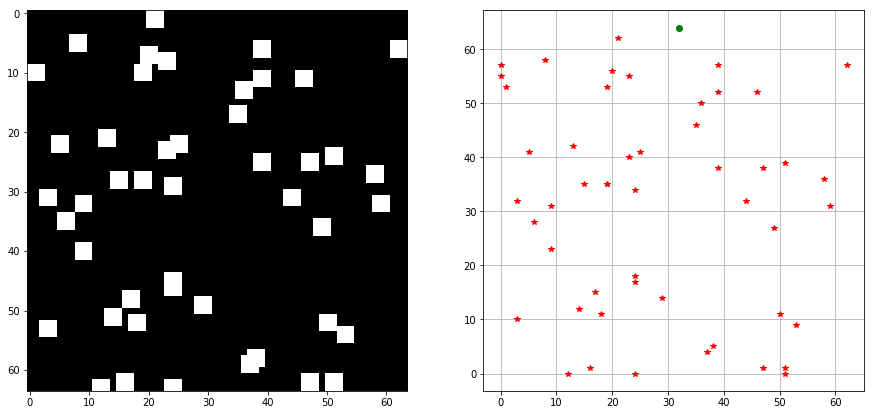

In [42]:
data = np.zeros((kMapSize,kMapSize), dtype=np.uint8)
radius = 1
for i in range(kNumFeatures):
    data[(kMapSize-1)-obstacles[1,i]-radius:(kMapSize-1)-obstacles[1,i]+radius+1,
         obstacles[0,i]-radius:obstacles[0,i]+radius+1] = 255
    
#     data[(kMapSize-1)-obstacles[1,i],
#          obstacles[0,i]] = 255
img = Image.fromarray(data, 'L')

plt.figure(figsize=(15,7))
plt.axis('equal')
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.plot(obstacles[0,:],obstacles[1,:],'r*');
plt.plot(xGoal[0],xGoal[1],'go')
plt.grid()
plt.show()

In [32]:
tmp = np.array([0,1,2,3,4])
tmp[0:2]

array([0, 1])

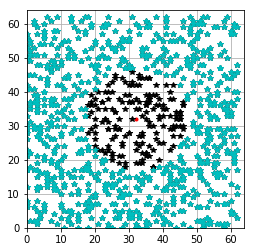

In [146]:
np.random.seed(0)
map_size = 64
num_things = 1000
bubble_size = 15
raw_tmp_things = np.random.randint(0, map_size - 1, size=(2, num_things))
tmp_things = np.array(raw_tmp_things)
the_middle = np.array([map_size / 2, map_size / 2]).reshape(2, -1)

relative_positions = raw_tmp_things - np.tile(the_middle, (1, num_things))
distances = np.sqrt(np.sum(np.square(relative_positions), axis=0))
tmp_things = np.delete(tmp_things,np.argwhere(distances < bubble_size),axis=1)

plt.plot(the_middle[0],the_middle[1],'r.')
plt.plot(raw_tmp_things[0,:],raw_tmp_things[1,:],'k*');
plt.plot(tmp_things[0,:],tmp_things[1,:],'c*');
plt.xlim(0, map_size)
plt.ylim(0, map_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

In [133]:
np.where(distances<bubble_size)

(array([ 0,  9, 15, 21, 22, 27, 41, 46]),)

In [161]:
import random
numbers = list(range(0,30)) + list(range(70,100))
r = random.choice(numbers)
r

73

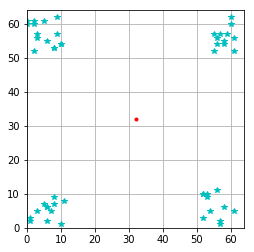

In [174]:
x_start = np.array([map_size / 2, map_size / 2]).reshape(2, -1)
bubble =20
numbers = list(range(0, int(x_start[0])-bubble)) + list(range(int(x_start[0])+bubble, map_size - 1))
obstacles = np.zeros([2, 50])
for i in range(50):
    obstacles[:,i] = [random.choice(numbers), random.choice(numbers)]
plt.plot(the_middle[0],the_middle[1],'r.')
plt.plot(obstacles[0,:],obstacles[1,:],'c*');
plt.xlim(0, map_size)
plt.ylim(0, map_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

In [168]:
x_start = np.array([map_size / 2, map_size / 2]).reshape(2, -1)
bubble =20
numbers = list(range(0, int(x_start[0])-bubble)) + list(range(int(x_start[0])+bubble, map_size - 1))
obstacles = np.zeros([2, 50])
for i in range(50):
    obstacles[:,i] = [random.choice(numbers), random.choice(numbers)]
plt.plot(the_middle[0],the_middle[1],'r.')
plt.plot(obstacles[0,:],obstacles[1,:],'c*');
plt.xlim(0, map_size)
plt.ylim(0, map_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

array([0., 0.])

In [187]:
obstacles[0,:] == 5

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False])

In [183]:
import random
rows = 2
columns = 5
[[random.randrange(22, 37, 2) for x in range(columns)] for y in range(rows)]

[[32, 24, 26, 22, 28], [30, 28, 32, 30, 26]]

In [205]:
labels = np.array([[1,2,3],[0.1,0.2,0.3]])
estimate = np.array([[1.1,2.2,3.3],[0.11,0.22,0.33]])
rmse_tmp = np.sqrt(np.mean(np.square(labels - estimate) / len(labels),axis=1))
print(rmse_tmp)

[0.15275252 0.01527525]


In [203]:
labels

array([[1. , 2. , 3. ],
       [0.1, 0.2, 0.3]])